<a href="https://colab.research.google.com/github/PeiLi-Sandman/machine_learning/blob/master/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 data set

## Loading the CIFAR10 data set

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [0]:
batch_size = 32
num_classes = 10
epochs = 30

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Model 1

In [0]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))

model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model1.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [0]:
history1 = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 15s 368us/step - loss: 2.0613 - acc: 0.2520 - val_loss: 1.8812 - val_acc: 0.3404
Epoch 2/30
40000/40000 [==============================] - 10s 251us/step - loss: 1.7042 - acc: 0.3901 - val_loss: 1.5594 - val_acc: 0.4451
Epoch 3/30
40000/40000 [==============================] - 10s 252us/step - loss: 1.5051 - acc: 0.4593 - val_loss: 1.4222 - val_acc: 0.4983
Epoch 4/30
40000/40000 [==============================] - 10s 251us/step - loss: 1.3966 - acc: 0.5027 - val_loss: 1.3857 - val_acc: 0.5038
Epoch 5/30
40000/40000 [==============================] - 10s 249us/step - loss: 1.3066 - acc: 0.5363 - val_loss: 1.3089 - val_acc: 0.5347
Epoch 6/30
40000/40000 [==============================] - 10s 251us/step - loss: 1.2350 - acc: 0.5614 - val_loss: 1.2377 - val_acc: 0.5684
Epoch 7/30
40000/40000 [==============================] - 10s 251us/

In [0]:
result1 = model1.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
test_acc_1 = result1[1]
print('The accuracy of model 1 for test data is: {}%'.format(test_acc_1*100))

10000/10000 [==============================] - 1s 99us/step
The accuracy of model 1 for test data is: 67.92%


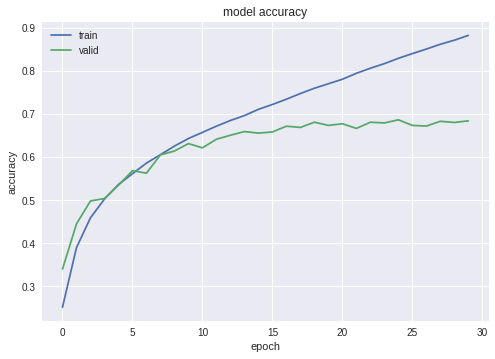

In [0]:
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

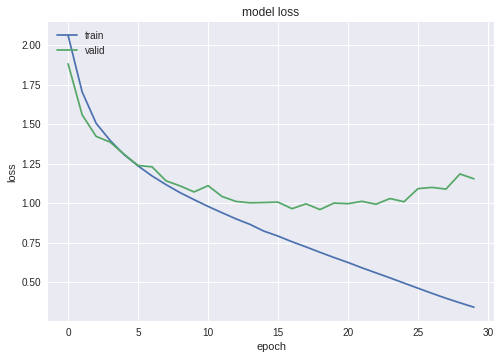

In [0]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [0]:
#add more layer and add droupout

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(32, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(32, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))

model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model2.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [0]:
history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=100,
          validation_split=0.2,
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 14s 342us/step - loss: 2.2975 - acc: 0.1153 - val_loss: 2.2745 - val_acc: 0.2001
Epoch 2/100
40000/40000 [==============================] - 13s 329us/step - loss: 2.1407 - acc: 0.1889 - val_loss: 2.2166 - val_acc: 0.1772
Epoch 3/100
40000/40000 [==============================] - 14s 339us/step - loss: 1.9885 - acc: 0.2489 - val_loss: 1.8831 - val_acc: 0.2988
Epoch 4/100
40000/40000 [==============================] - 13s 330us/step - loss: 1.8633 - acc: 0.2949 - val_loss: 1.8076 - val_acc: 0.3197
Epoch 5/100
40000/40000 [==============================] - 13s 330us/step - loss: 1.7936 - acc: 0.3267 - val_loss: 1.6924 - val_acc: 0.3649
Epoch 6/100
40000/40000 [==============================] - 13s 332us/step - loss: 1.7358 - acc: 0.3497 - val_loss: 1.6188 - val_acc: 0.3979
Epoch 7/100
40000/40000 [==============================] - 13s 332us/step - loss: 1.6658 - acc: 0.3819 - val_l

In [0]:
result2 = model2.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
test_acc_2 = result2[1]
print('The accuracy of model 2 for test data is: {}%'.format(test_acc_2*100))

10000/10000 [==============================] - 1s 109us/step
The accuracy of model 2 for test data is: 76.7%


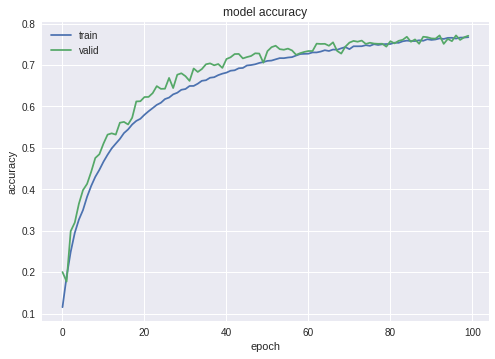

In [0]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

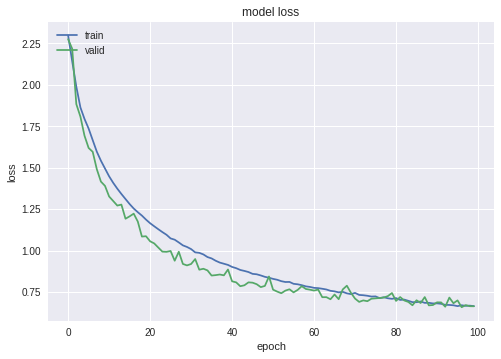

In [0]:
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [0]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))

model3.add(Conv2D(32, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))

model3.add(Conv2D(32, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.1))

model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))

model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

In [0]:
#define a new optimizer
from keras.optimizers import Adam
adam = Adam()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model3.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [0]:
history3 = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 14s 347us/step - loss: 1.5904 - acc: 0.4183 - val_loss: 1.3146 - val_acc: 0.5181
Epoch 2/30
40000/40000 [==============================] - 14s 341us/step - loss: 1.2412 - acc: 0.5546 - val_loss: 1.1326 - val_acc: 0.5939
Epoch 3/30
40000/40000 [==============================] - 13s 327us/step - loss: 1.0906 - acc: 0.6124 - val_loss: 1.0490 - val_acc: 0.6355
Epoch 4/30
40000/40000 [==============================] - 13s 326us/step - loss: 0.9892 - acc: 0.6486 - val_loss: 0.9390 - val_acc: 0.6676
Epoch 5/30
40000/40000 [==============================] - 13s 328us/step - loss: 0.9142 - acc: 0.6754 - val_loss: 0.8973 - val_acc: 0.6805
Epoch 6/30
40000/40000 [==============================] - 13s 326us/step - loss: 0.8532 - acc: 0.7009 - val_loss: 0.8491 - val_acc: 0.7016
Epoch 7/30
40000/40000 [==============================] - 13s 334us/step - loss: 0.8045 - acc: 0.7125 - val_loss: 0.

In [0]:
result3 = model3.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
test_acc_3 = result3[1]
print('The accuracy of model 3 for test data is: {}%'.format(test_acc_3*100))

10000/10000 [==============================] - 1s 101us/step
The accuracy of model 3 for test data is: 73.72999999999999%


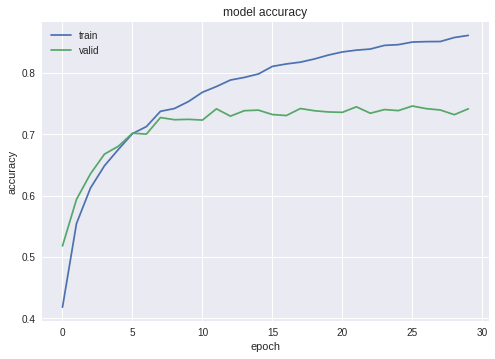

In [0]:
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

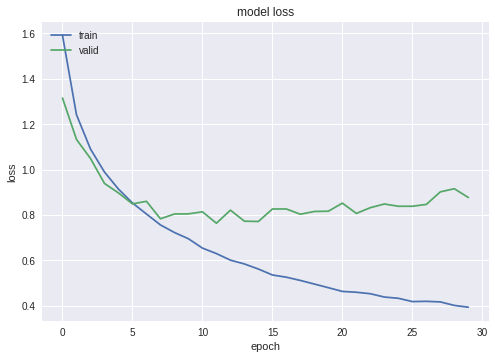

In [0]:
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20)

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [0]:
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.1))

model4.add(Conv2D(32, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.1))

model4.add(Conv2D(32, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.1))

model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.2))

model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

In [0]:
model4.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [0]:
# add augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)

In [0]:
history4 = model4.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] / batch_size,
                    epochs=30,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/30
1250/1250 [==============================] - 32s 26ms/step - loss: 1.7676 - acc: 0.3496 - val_loss: 1.6522 - val_acc: 0.4110
Epoch 2/30
1250/1250 [==============================] - 31s 24ms/step - loss: 1.5250 - acc: 0.4394 - val_loss: 1.3442 - val_acc: 0.5138
Epoch 3/30
1250/1250 [==============================] - 30s 24ms/step - loss: 1.4257 - acc: 0.4796 - val_loss: 1.2783 - val_acc: 0.5371
Epoch 4/30
1250/1250 [==============================] - 31s 25ms/step - loss: 1.3648 - acc: 0.5099 - val_loss: 1.2163 - val_acc: 0.5622
Epoch 5/30
1250/1250 [==============================] - 30s 24ms/step - loss: 1.3134 - acc: 0.5269 - val_loss: 1.1889 - val_acc: 0.5716
Epoch 6/30
1250/1250 [==============================] - 31s 25ms/step - loss: 1.2767 - acc: 0.5422 - val_loss: 1.1261 - val_acc: 0.5962
Epoch 7/30
1250/1250 [==============================] - 31s 25ms/step - loss: 1.2421 - acc: 0.5534 - val_loss: 1.1030 - val_acc: 0.6045
Epoch 8/30
1250/1250 [==========================

In [0]:
result4 = model4.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
test_acc_4 = result4[1]
print('The accuracy of model 4 for test data is: {}%'.format(test_acc_4*100))

10000/10000 [==============================] - 1s 103us/step
The accuracy of model 4 for test data is: 66.67999999999999%


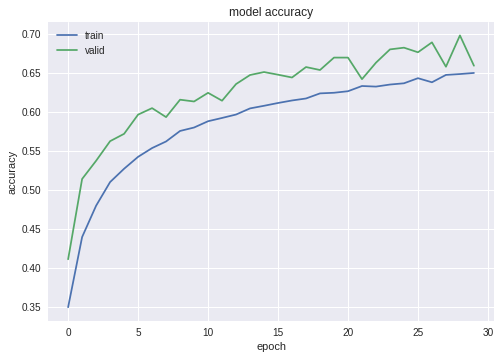

In [0]:
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

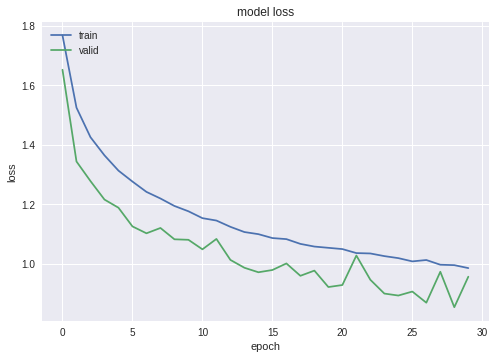

In [0]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()